What are the top 3 and the bottom 3 states in terms of number of users?

What are the top 3 and the bottom 3 states in terms of user engagement? You can choose how to mathematically define user engagement. What the CEO cares about here is in which states users are using the product a lot/very little.

The CEO wants to send a gift to the first user who signed-up for each state. That is, the first user who signed-up from California, from Oregon, etc. Can you give him a list of those users?

Build a function that takes as an input any of the songs in the data and returns the most likely song to be listened next. That is, if, for instance, a user is currently listening to "Eight Days A Week", which song has the highest probability of being played right after it by the same user? This is going to be v1 of a song recommendation model.

How would you set up a test to check whether your model works well and is improving engagement?

In [3]:
import pandas as pd

data = pd.read_json('song.json', orient='records')
data['user_id']           = data['user_id'].astype('string')
data['time_played']       = pd.to_datetime(data['time_played'])
data['user_sign_up_date'] = pd.to_datetime(data['user_sign_up_date'])

In [4]:
data.head()

,id,song_played,time_played,user_id,user_sign_up_date,user_state
0,GOQMMKSQQH,Hey Jude,2015-06-11 21:51:35,122,2015-05-16,Louisiana
1,HWKKBQKNWI,We Can Work It Out,2015-06-06 16:49:19,3,2015-05-01,Ohio
2,DKQSXVNJDH,Back In the U.S.S.R.,2015-06-14 02:11:29,35,2015-05-04,New Jersey
3,HLHRIDQTUW,P.s. I Love You,2015-06-08 12:26:10,126,2015-05-16,Illinois
4,SUKJCSBCYW,Sgt. Pepper's Lonely Hearts Club Band,2015-06-28 14:57:00,6,2015-05-01,New Jersey


In [5]:
data.describe()

,id,song_played,time_played,user_id,user_sign_up_date,user_state
count,4000,4000,4000,4000,4000,4000
unique,4000,100,3997,196,20,41
top,SGBIQPZCAE,Come Together,2015-06-06 08:42:20,42,2015-05-19 00:00:00,New York
freq,1,408,2,52,532,469
first,NaN,NaN,2015-06-01 05:02:54,NaN,2015-05-01 00:00:00,NaN
last,NaN,NaN,2015-06-28 23:46:06,NaN,2015-05-20 00:00:00,NaN


In [25]:
states = data.groupby('user_state').user_id.nunique()
states.sort(ascending=False)
states[:3]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


user_state
New York      23
California    21
Texas         15
Name: user_id, dtype: int64

In [24]:
states = data.groupby('user_state').apply(lambda x: len(x.id.unique())  / len(x.user_id.unique()))
states.sort(ascending=False)
states[:3]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


user_state
Nebraska       36
Alaska         29
Mississippi    28
dtype: int64

## Recommendation

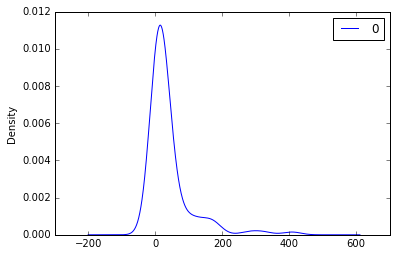

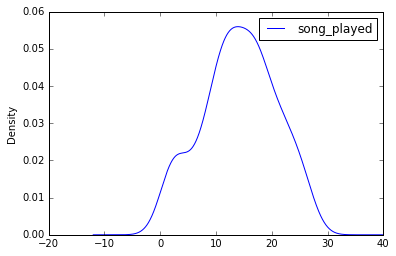

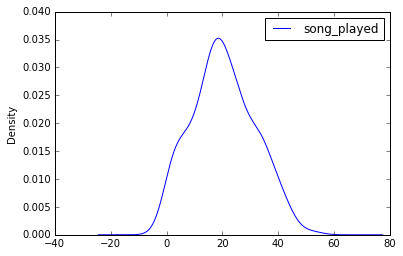

In [42]:
import matplotlib
%matplotlib inline
pd.DataFrame(data.groupby('song_played').size()).plot.kde()
pd.DataFrame(data.groupby('user_id').song_played.nunique()).plot.kde()
pd.DataFrame(data.groupby('user_id').song_played.count()).plot.kde()

- Highly skewed (small number of songs are listened the most)
- Users listen to the same song over and over


- Approachs

    - Baseline ( popularity )
    - Probabilistic ( based P(listen a|listened b, x) )
    - Collaborative filtering - user based ( based on "rating" estimate of set of similar users )
    - Collaborative filtering - item based ( based on degree of similarity to other items )
    - Matrix factorization ( U x I )
    - With we had meta data: clustering into "genres", content based similarity. 


- TODO
    - How to inspect useful features?
    - Can we cluster users / songs in "genre propensity"?

In [ ]:
# prior = for each song: count(s) / total 
# for s in songs:
#     for f in features:
#         likelihood = ( count(f,s) + k ) / ( count(s) + k*count(distinct f) )

In [7]:
data['previous_song'] = data.sort_values(by='time_played').groupby('user_id').song_played.transform('shift', 1)
data['previous_time'] = data.sort_values(by='time_played').groupby('user_id').time_played.transform('shift', 1)
data['hour']          = data.time_played.dt.hour
data['day']           = data.time_played.dt.dayofweek
data['since_last']    = data.time_played - data.previous_time
data['previous_song'] = data['previous_song'].fillna('_______')
# fresh user?
# popularity song over time
# less weight when relistening?

In [8]:
data[data.user_id == '122'].sort_values(by='time_played').head()

,id,song_played,time_played,user_id,user_sign_up_date,user_state,previous_song,previous_time,hour,day,since_last
3053,KKSBLIUDTP,Revolution,2015-06-01 14:06:23,122,2015-05-16,Louisiana,_______,NaT,14,0,NaT
1904,YYAFSKFFCP,Get Back,2015-06-01 17:38:00,122,2015-05-16,Louisiana,Revolution,2015-06-01 14:06:23,17,0,0 days 03:31:37
1994,TXZXXZLKZL,Reprise / Day in the Life,2015-06-02 22:32:25,122,2015-05-16,Louisiana,Get Back,2015-06-01 17:38:00,22,1,1 days 04:54:25
3995,MKVEXMRJGF,Paperback Writer,2015-06-03 08:26:26,122,2015-05-16,Louisiana,Reprise / Day in the Life,2015-06-02 22:32:25,8,2,0 days 09:54:01
3424,RWAYCFCHYJ,Birthday,2015-06-03 22:32:13,122,2015-05-16,Louisiana,Paperback Writer,2015-06-03 08:26:26,22,2,0 days 14:05:47


In [31]:
from sklearn.model_selection import *
from sklearn.naive_bayes import BernoulliNB
from operator import itemgetter
from sklearn.preprocessing import *
import numpy as np

def evaluate(model, x, y, k=1):
    scrs    = model.predict_proba(x)
    results = []
    for pred, _true in zip(scrs,y):
        indexes = np.argsort(pred)[::-1]
        results.append(_true in model.classes_[indexes[:k]])
    return np.mean(results)
        
def do_train(x,y):
    nb = BernoulliNB(alpha=1)
    nb.fit(x, y)
    return nb

In [10]:
data['previous_song']   = LabelEncoder().fit_transform(data['previous_song'])
data['song_played_int'] = LabelEncoder().fit_transform(data['song_played'])
data['user_state_int'] = LabelEncoder().fit_transform(data['user_state'])

classes     = sorted(data['song_played'].unique())
train, test = train_test_split(data, test_size=.1, random_state=41)

features        = [ 'previous_song' ] # 'user_state', 'hour', 'day', since_last,
x_train, x_test = train[features], test[features]
y_train, y_test = train['song_played'], test['song_played']
ohc = OneHotEncoder().fit(x_train)

In [32]:
x_enc = ohc.transform(x_train)
model   = do_train(x_enc, y_train)

x_enc  = ohc.transform(x_test)
(evaluate(model, x_enc, y_test, k=5),
 evaluate(model, x_enc, y_test, k=3),
 evaluate(model, x_enc, y_test, k=1))

(0.38250000000000001, 0.26500000000000001, 0.105)

In [33]:
all_ = pd.merge(train, train[['user_id', 'song_played_int']], left_on='user_id', right_on='user_id')
all_ = all_[all_.song_played_int_x != all_.song_played_int_y]

features = [ 'song_played_int_y' ] # 'user_state', 'hour', 'day', since_last, 
x, y     = all_[features], all_['song_played']

x_enc = ohc.transform(x)
model = do_train(x_enc, y)

x_enc  = ohc.transform(x_test)
(evaluate(model, x_enc, y_test, k=5),
 evaluate(model, x_enc, y_test, k=3),
 evaluate(model, x_enc, y_test, k=1))

(0.37, 0.26750000000000002, 0.10249999999999999)

In [24]:
class Popularity():
    def fit(self, train, y):
        self.scores_ = y.value_counts() / y.shape[0]
        self.classes_ = np.array(sorted(self.scores_.index))
        self.preds_  = self.scores_[self.classes_].values

    def predict_proba(self, df):
        return [ self.preds_ for i in df.values ]

In [34]:
model = Popularity()
model.fit(x_train, y_train)

(evaluate(model, x_test, y_test, k=5),
 evaluate(model, x_test, y_test, k=3),
 evaluate(model, x_test, y_test, k=1))

(0.38250000000000001, 0.27000000000000002, 0.105)